# Data Acquisition & Preparation #

In order to continue with our analysis we first need to see the condition of our data. <br />
And then prepare the in order to use them correctly

## Load packages ##

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data ##

We will only use the calendar.csv file because seasons are the thing we want to investigate

In [4]:
df_cal=pd.read_csv('C:/Users/chris/Desktop/Ex_Files_Learning_Python/calendar.csv',sep=',')

## View Data ##

Quick look at the dataset in order to notice anything we need to change so that we continue further

In [5]:
# Quick look at the data
print(df_cal.head())
print('\nThe shape of our data :',df_cal.shape)
print('\n',df_cal.dtypes)

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

The shape of our data : (1393570, 4)

 listing_id     int64
date          object
available     object
price         object
dtype: object


#### We see that date and price are labeled as an object so we need to change that as we move on.

## Check for duplicates

In [6]:
# Check for duplicates
print(df_cal.duplicated().sum())

0


As we see don't have any duplicate so we don't need to look into it any further

## Change price format and clean the data

In [7]:
# Make the prices float type and remove any symbols we don't need
for i in '$,':
    df_cal['price'] = df_cal['price'].str.replace(i,'')
    
df_cal['price']=pd.to_numeric(df_cal['price'])
print(df_cal['price'].describe)

<bound method NDFrame.describe of 0          85.0
1          85.0
2           NaN
3           NaN
4           NaN
           ... 
1393565     NaN
1393566     NaN
1393567     NaN
1393568     NaN
1393569     NaN
Name: price, Length: 1393570, dtype: float64>


#### There are too many null values so we need to remove them in order to continue. 

In [8]:
# Drop the null values
df_cal=df_cal.dropna(subset=['price'],axis=0)
print(df_cal.shape)

(934542, 4)


#### As we see our dataset rows are less so we know that null valuew have been removed. <br />
## View Data

In [9]:
# Check how many null values we have in each column
print('\n',df_cal.isnull().mean())


 listing_id    0.0
date          0.0
available     0.0
price         0.0
dtype: float64


## Change the date format 

I noticed that date format was presented as object so i used pandas to change it to its right format in order to be usable

In [10]:
# Turn date from object to date format
df_cal['date']= pd.to_datetime(df_cal['date'])

# Data Exploration #

## Create 3 new columns using the date.<br />
We need to anayse the data by month so let's split the date into 3 new columns
* 1 column containing the Year named Year. <br />
* 1 column containing the Month called Month. <br />
* 1 column containing the Day called Day

In [11]:
# Split date into new columns of Year, Month, Day
df_cal['Year']=df_cal['date'].dt.year
df_cal['Month']=df_cal['date'].dt.month
df_cal['Day']=df_cal['date'].dt.day
print(df_cal.head())

    listing_id       date available  price  Year  Month  Day
0       241032 2016-01-04         t   85.0  2016      1    4
1       241032 2016-01-05         t   85.0  2016      1    5
9       241032 2016-01-13         t   85.0  2016      1   13
10      241032 2016-01-14         t   85.0  2016      1   14
14      241032 2016-01-18         t   85.0  2016      1   18


### Now lets see how many months each year has in our data.

In [12]:
# Let's see how many years we have and how many months on each year
print(df_cal.groupby(['Year'])['Month'].unique())

Year
2016    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017                                        [1]
Name: Month, dtype: object


#### Only January of 2017 is on the dataframe for this particular year, so we will continue without taking it into consideration as we want to see which month tends to get higher house pricing

### New dataframe containing only the year 2016.

In [13]:
# We only have January of 2017 so we don't need that year for our research
df_cal_2016=df_cal[df_cal['Year']==2016]

## Price per Month
We will use groupby in order to group by Month in our new dataframe df_cal_2016 and see what the average price per month is for the year 2016 using the mean() command.

In [14]:
# Average price per month
rpd=df_cal_2016.groupby(['Month'])['price'].mean()
rpd=rpd.sort_values(ascending=False)
print(rpd)

Month
7     152.094150
8     150.656594
6     147.473137
9     143.255949
5     139.538183
12    137.251835
10    137.031939
11    135.688738
4     135.097005
3     128.644488
2     124.293927
1     121.568409
Name: price, dtype: float64


#### Here we see the average price per month of 2016 and we can already tell that July has the highest pricing

# Visualization #

We will create a bar chart using the x axis as the months we have and the y axis as the average price. <br />
The reuslt will be a visual picture of the different average prices per month for 2016

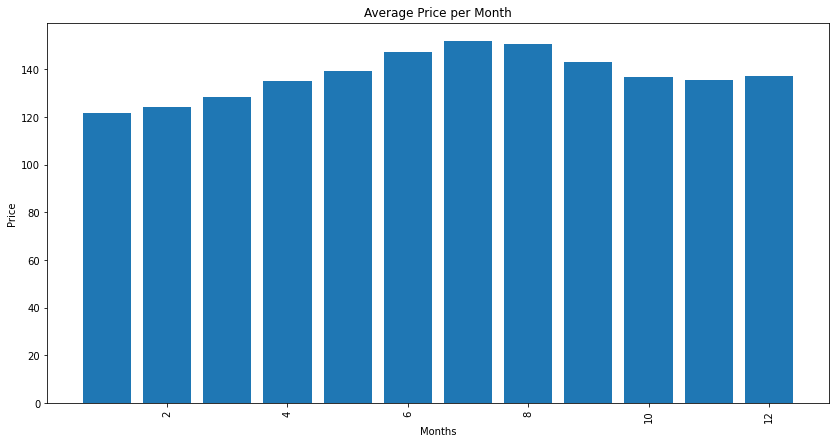

In [22]:
# Bar chart for visualization

"""Creating a bar chart with : x = Months
                               y =Avearge prices
     in order to have a visualization of the code we used"""    
    
    
plt.figure(figsize=(14,7))
plt.bar(rpd.index,rpd)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Price')
plt.title('Average Price per Month')
plt.show()

# Question

What months does house pricing go up?

# Conclusion #

As we see during the months of summer we see the biggest spike in the housing prices and as expected the second biggest spike is in the winter season.
So the answer to the question:
 
 In which months do house pricings see increase?


is :

In summer months and especially in July